In [1]:
import pandas as pd
import matplotlib as plt
import itertools
import operator

In [74]:
import numpy as np

In [2]:
mimic = 'D:\\data\\mimic3\\time_series\\mimic.csv'
mimic3 = pd.read_csv(mimic)

In [4]:
mimic3.tail()

,Time,icustay_id,hadm_id,age,gender,Heart Rate,Respiratory Rate,SpO2/SaO2,pH,Potassium,...,Creatinine,Blood Pressure,1 hours urine output,6 hours urine output,Next 6 hours urine output,AKI,gcs,ventilation,vasoactive medications,sedative medications
2589382,2157-05-23 05:00:00,275346,156386,34,1,83.0,17.0,98.0,7.39,3.9,...,0.6,92.0,220.0,920.0,1425.0,0,15.0,0,0,0
2589383,2157-05-23 06:00:00,275346,156386,34,1,88.0,20.0,99.0,7.39,3.9,...,0.6,97.0,240.0,1000.0,1565.0,0,15.0,0,0,0
2589384,2157-05-23 07:00:00,275346,156386,34,1,84.0,18.0,98.0,7.39,3.9,...,0.6,88.0,140.0,1120.0,1560.0,0,15.0,0,0,0
2589385,2157-05-23 08:00:00,275346,156386,34,1,77.0,19.0,96.0,7.39,3.9,...,0.6,103.0,125.0,1140.0,1700.0,0,15.0,0,0,0
2589386,2157-05-23 09:00:00,275346,156386,34,1,86.0,21.0,96.0,7.39,3.9,...,0.6,103.0,440.0,1145.0,1860.0,0,15.0,0,0,0


### NULL value detection: good news, there are no missing values

In [41]:
mimic3.isnull().any().any()

False

In [42]:
mimic3.isnull().sum().sum()

0

### we have 25053 instances

In [5]:
icustay_id=mimic3.icustay_id.unique()
len(icustay_id)

25053

In [6]:
hadm_id=mimic3.hadm_id.unique()
len(hadm_id)

22925

### vasoactive medication:血管活性药物;sedative medications,镇静药物

In [46]:
col_name = list(mimic3) #30 columns

### select one patient

In [8]:
p241507 = mimic3[mimic3.icustay_id == 241507] 

In [9]:
p241507.hadm_id.unique()

array([158689], dtype=int64)

In [126]:
# p280836.ventilation

In [24]:
p241507.head()

,Time,icustay_id,hadm_id,age,gender,Heart Rate,Respiratory Rate,SpO2/SaO2,pH,Potassium,...,Creatinine,Blood Pressure,1 hours urine output,6 hours urine output,Next 6 hours urine output,AKI,gcs,ventilation,vasoactive medications,sedative medications
68,2141-04-19 06:00:00,241507,158689,33,1,71.0,12.0,100.0,7.34,3.4,...,0.7,92.000000,0.0,0.0,614.0,0,15.0,0,0,0
69,2141-04-19 07:00:00,241507,158689,33,1,71.0,12.0,100.0,7.34,3.4,...,0.7,92.000000,0.0,0.0,654.0,0,15.0,0,0,0
70,2141-04-19 08:00:00,241507,158689,33,1,70.0,15.5,100.0,7.34,3.4,...,0.7,86.833351,400.0,0.0,694.0,0,15.0,1,0,1
71,2141-04-19 09:00:00,241507,158689,33,1,66.0,12.0,100.0,7.34,3.4,...,0.7,82.333351,160.0,0.0,334.0,0,15.0,1,0,1
72,2141-04-19 10:00:00,241507,158689,33,1,68.0,15.0,100.0,7.34,3.4,...,0.7,85.000000,24.0,0.0,174.0,1,15.0,1,0,1


In [22]:
xaxis = list(range(len(p241507)))

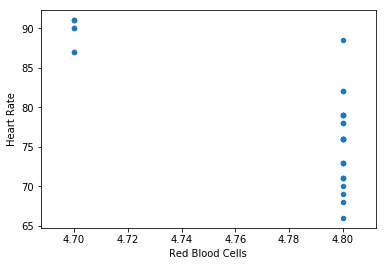

In [33]:
p241507.plot.scatter(x='Red Blood Cells', y='Heart Rate')

In [53]:
p241507.plot?

### one patient sketch

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


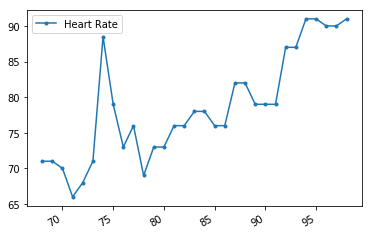

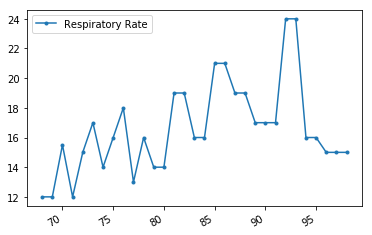

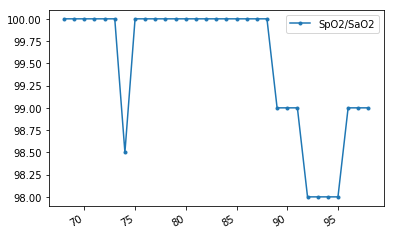

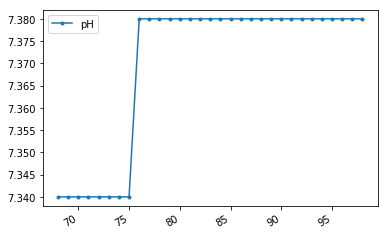

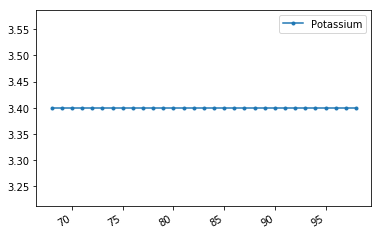

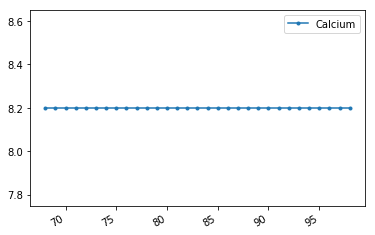

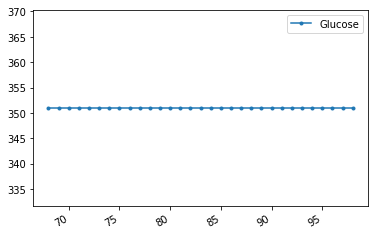

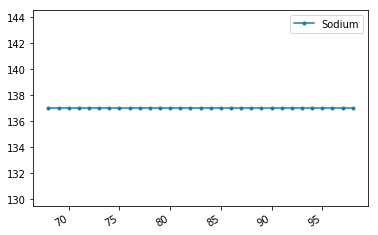

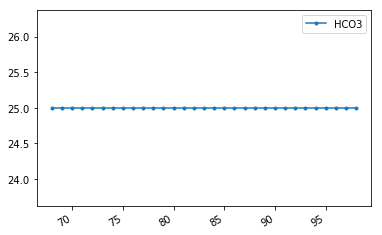

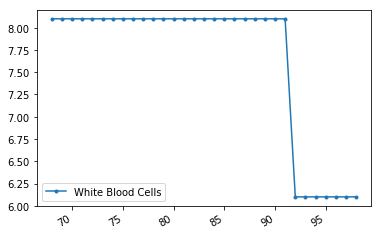

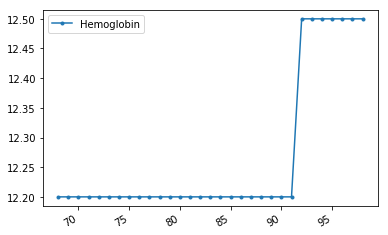

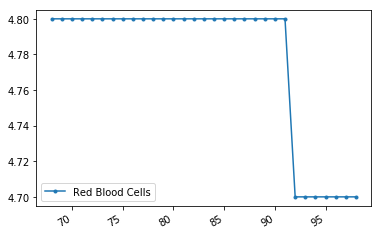

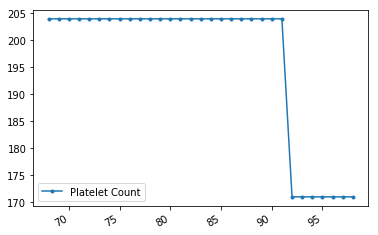

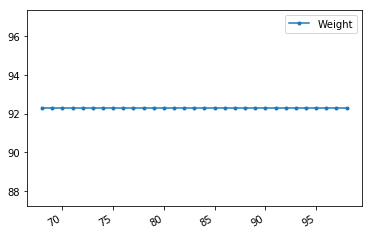

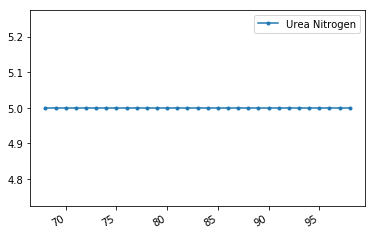

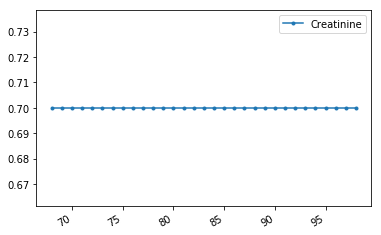

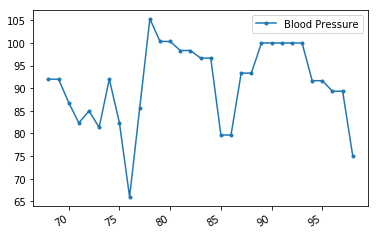

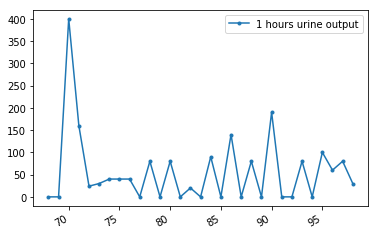

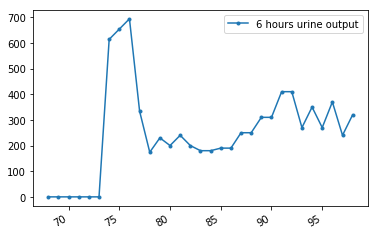

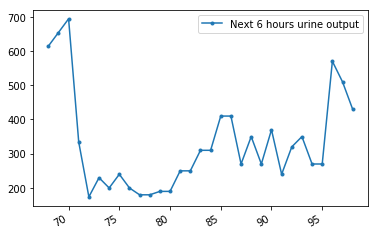

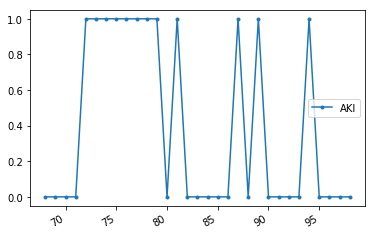

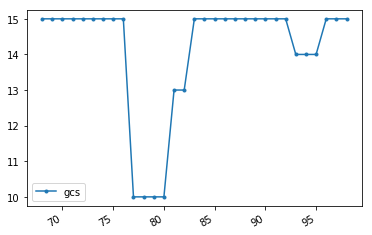

In [56]:
for item in col_name[5:27]:
    p241507.plot(kind='line', style='.-', subplots= True, y=item)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


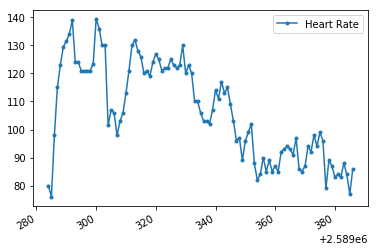

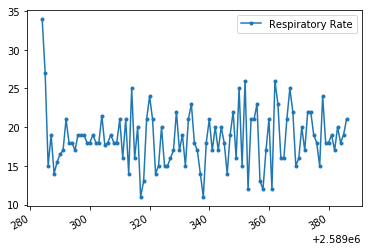

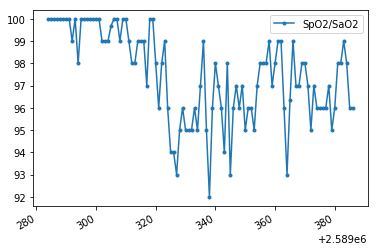

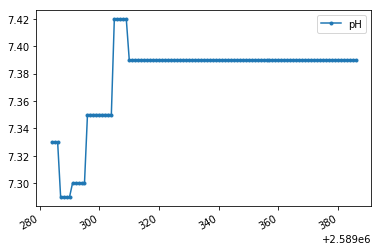

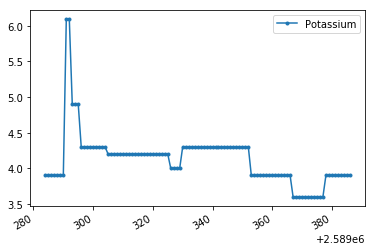

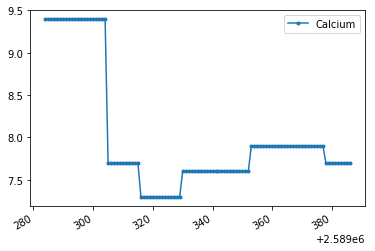

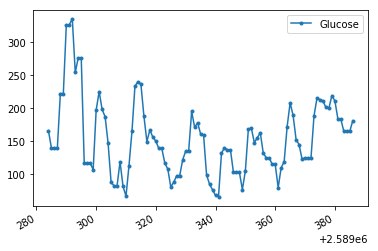

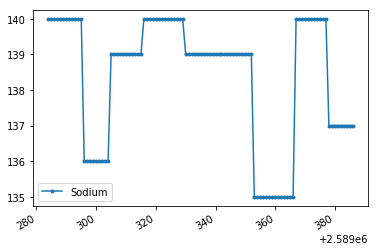

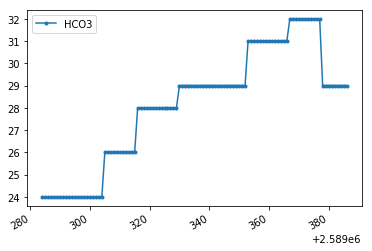

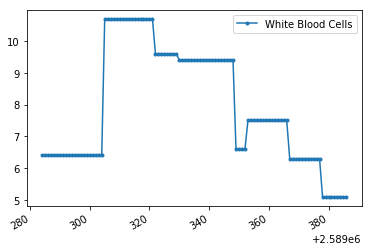

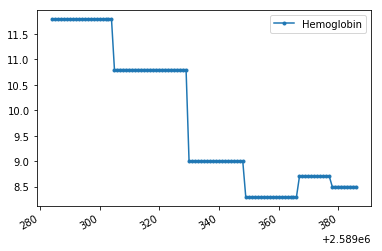

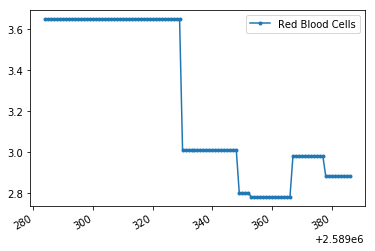

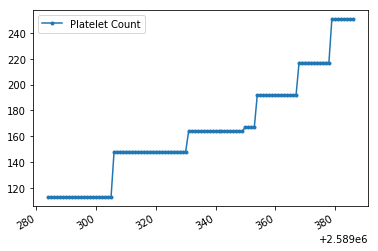

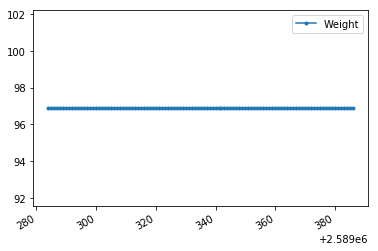

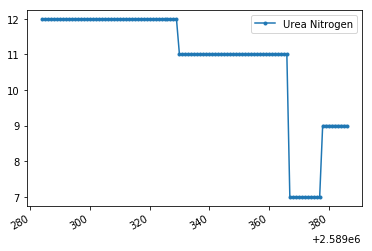

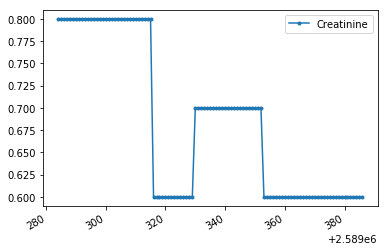

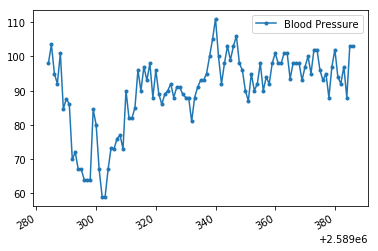

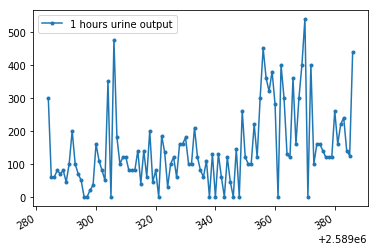

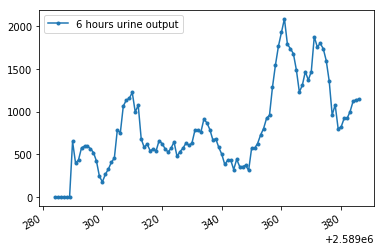

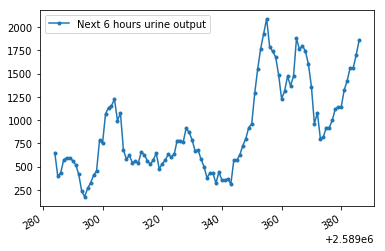

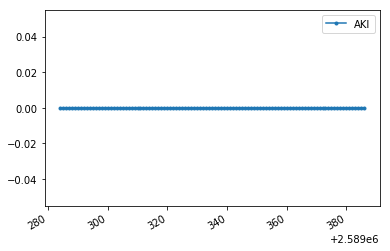

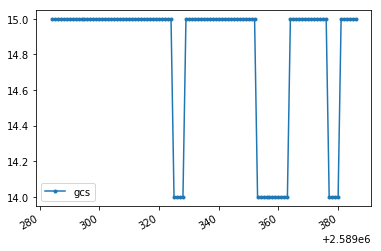

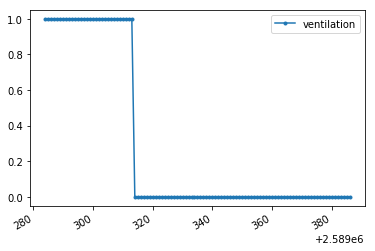

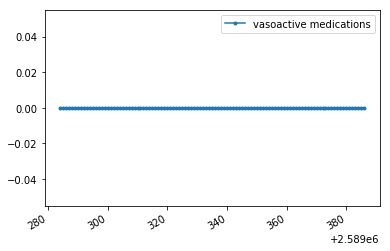

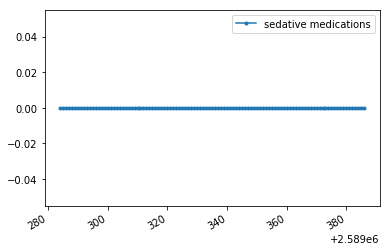

In [59]:
p275346 = mimic3[mimic3['icustay_id'] == 275346]
for item in col_name[5:30]:
    p275346.plot(kind='line', style='.-', subplots= True, y=item)

In [60]:
p241507

,Time,icustay_id,hadm_id,age,gender,Heart Rate,Respiratory Rate,SpO2/SaO2,pH,Potassium,...,Creatinine,Blood Pressure,1 hours urine output,6 hours urine output,Next 6 hours urine output,AKI,gcs,ventilation,vasoactive medications,sedative medications
68,2141-04-19 06:00:00,241507,158689,33,1,71.0,12.0,100.0,7.34,3.4,...,0.7,92.000000,0.0,0.0,614.0,0,15.0,0,0,0
69,2141-04-19 07:00:00,241507,158689,33,1,71.0,12.0,100.0,7.34,3.4,...,0.7,92.000000,0.0,0.0,654.0,0,15.0,0,0,0
70,2141-04-19 08:00:00,241507,158689,33,1,70.0,15.5,100.0,7.34,3.4,...,0.7,86.833351,400.0,0.0,694.0,0,15.0,1,0,1
71,2141-04-19 09:00:00,241507,158689,33,1,66.0,12.0,100.0,7.34,3.4,...,0.7,82.333351,160.0,0.0,334.0,0,15.0,1,0,1
72,2141-04-19 10:00:00,241507,158689,33,1,68.0,15.0,100.0,7.34,3.4,...,0.7,85.000000,24.0,0.0,174.0,1,15.0,1,0,1
73,2141-04-19 11:00:00,241507,158689,33,1,71.0,17.0,100.0,7.34,3.4,...,0.7,81.333298,30.0,0.0,230.0,1,15.0,1,0,1
74,2141-04-19 12:00:00,241507,158689,33,1,88.5,14.0,98.5,7.34,3.4,...,0.7,92.000000,40.0,614.0,200.0,1,15.0,0,0,1
75,2141-04-19 13:00:00,241507,158689,33,1,79.0,16.0,100.0,7.34,3.4,...,0.7,82.333298,40.0,654.0,240.0,1,15.0,0,0,1
76,2141-04-19 14:00:00,241507,158689,33,1,73.0,18.0,100.0,7.38,3.4,...,0.7,66.000000,40.0,694.0,200.0,1,15.0,0,0,0
77,2141-04-19 15:00:00,241507,158689,33,1,76.0,13.0,100.0,7.38,3.4,...,0.7,85.666702,0.0,334.0,180.0,1,10.0,0,0,0


In [67]:
px = p241507.iloc[:,5:27]
px

,Heart Rate,Respiratory Rate,SpO2/SaO2,pH,Potassium,Calcium,Glucose,Sodium,HCO3,White Blood Cells,...,Platelet Count,Weight,Urea Nitrogen,Creatinine,Blood Pressure,1 hours urine output,6 hours urine output,Next 6 hours urine output,AKI,gcs
68,71.0,12.0,100.0,7.34,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,92.000000,0.0,0.0,614.0,0,15.0
69,71.0,12.0,100.0,7.34,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,92.000000,0.0,0.0,654.0,0,15.0
70,70.0,15.5,100.0,7.34,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,86.833351,400.0,0.0,694.0,0,15.0
71,66.0,12.0,100.0,7.34,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,82.333351,160.0,0.0,334.0,0,15.0
72,68.0,15.0,100.0,7.34,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,85.000000,24.0,0.0,174.0,1,15.0
73,71.0,17.0,100.0,7.34,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,81.333298,30.0,0.0,230.0,1,15.0
74,88.5,14.0,98.5,7.34,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,92.000000,40.0,614.0,200.0,1,15.0
75,79.0,16.0,100.0,7.34,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,82.333298,40.0,654.0,240.0,1,15.0
76,73.0,18.0,100.0,7.38,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,66.000000,40.0,694.0,200.0,1,15.0
77,76.0,13.0,100.0,7.38,3.4,8.2,351.0,137.0,25.0,8.1,...,204.0,92.300003,5.0,0.7,85.666702,0.0,334.0,180.0,1,10.0


In [65]:
from sklearn import preprocessing

x = px.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
pxdf = pd.DataFrame(x_scaled)

### global nomalization, 避免一个病人的某一列都为0

In [68]:
mimic3_x = mimic3.iloc[:,5:27]
x = mimic3_x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
mimic3_x_df = pd.DataFrame(x_scaled)

In [75]:
np.amin(x_scaled, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [76]:
mimic3_x_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.567416,0.972973,0.985000,0.962865,0.750000,0.824074,0.259777,0.869281,0.725,0.366755,...,0.256374,0.552294,0.566372,0.287356,0.568783,0.034936,0.058177,0.058177,0.0,1.000000
1,0.567416,0.972973,0.985000,0.962865,0.750000,0.824074,0.259777,0.869281,0.725,0.366755,...,0.256374,0.552294,0.566372,0.287356,0.568783,0.034936,0.058177,0.058411,1.0,1.000000
2,0.550562,0.972973,0.975000,0.962865,0.750000,0.824074,0.203911,0.869281,0.725,0.366755,...,0.256374,0.552294,0.566372,0.287356,0.529101,0.034936,0.058177,0.058411,1.0,1.000000
3,0.494382,0.972973,0.950000,0.962865,0.750000,0.824074,0.203911,0.869281,0.725,0.366755,...,0.256374,0.552294,0.566372,0.287356,0.558201,0.034936,0.058177,0.058411,1.0,0.733333
4,0.543071,0.972973,0.920000,0.961538,0.750000,0.824074,0.203911,0.869281,0.725,0.366755,...,0.256374,0.552294,0.566372,0.287356,0.657407,0.034936,0.058177,0.058411,1.0,0.733333
5,0.536517,0.972973,0.930000,0.961538,0.750000,0.824074,0.203911,0.869281,0.725,0.366755,...,0.256374,0.552294,0.566372,0.287356,0.588624,0.034936,0.058177,0.058411,1.0,0.733333
6,0.528090,0.972973,0.870000,0.961538,0.750000,0.824074,0.203911,0.869281,0.725,0.366755,...,0.256374,0.552294,0.566372,0.287356,0.576720,0.035357,0.058177,0.058663,1.0,0.866667
7,0.528090,0.972973,0.870000,0.961538,0.796875,0.777778,0.393855,0.869281,0.675,0.366755,...,0.256374,0.552294,0.575221,0.321839,0.576720,0.034936,0.058411,0.058448,0.0,0.866667
8,0.528090,0.972973,0.870000,0.961538,0.796875,0.777778,0.315642,0.869281,0.675,0.366755,...,0.256374,0.552294,0.575221,0.321839,0.576720,0.034936,0.058411,0.058448,0.0,0.866667
9,0.500000,0.648649,0.965000,0.949602,0.796875,0.777778,0.237430,0.869281,0.675,0.366755,...,0.256374,0.552294,0.575221,0.321839,0.515873,0.034936,0.058411,0.058448,1.0,0.933333


In [66]:
pxdf

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.20,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.661023,0.000,0.000000,0.846154,0.0,1.0
1,0.20,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.661023,0.000,0.000000,0.923077,0.0,1.0
2,0.16,0.291667,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.529666,1.000,0.000000,1.000000,0.0,1.0
3,0.00,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.415258,0.400,0.000000,0.307692,0.0,1.0
4,0.08,0.250000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.483055,0.060,0.000000,0.000000,1.0,1.0
5,0.20,0.416667,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.389833,0.075,0.000000,0.107692,1.0,1.0
6,0.90,0.166667,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.661023,0.100,0.884726,0.050000,1.0,1.0
7,0.52,0.333333,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.415257,0.100,0.942363,0.126923,1.0,1.0
8,0.28,0.500000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.000000,0.100,1.000000,0.050000,1.0,1.0
9,0.40,0.083333,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.500005,0.000,0.481268,0.011538,1.0,0.0


## statistics of ventilation

In [69]:
ventiBlock = []
for item in icustay_id:
    patient = mimic3[mimic3.icustay_id == item]
#     patient.ventilation.plot(subplots=True,layout=(6, 2), figsize=(6, 6))
    lis = list(patient.ventilation)
    curBlock = [[i for i,value in it] for key,it in itertools.groupby(enumerate(list(lis)), key=operator.itemgetter(1)) if key != 0]
    ventiBlock.append(curBlock)
ventiTimes = [len(item) for item in ventiBlock]

Text(0,0.5,'Numbers of patients')

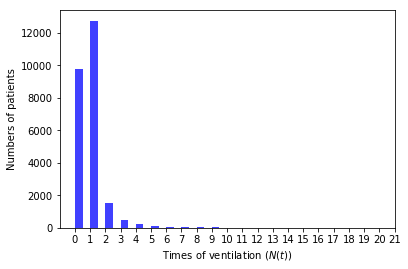

In [136]:
plt.pyplot.hist(ventiTimes,bins=40,facecolor='b', alpha=0.75)
plt.pyplot.xticks(range(22))
plt.pyplot.xlabel(r'Times of ventilation ($N(t)$)')
plt.pyplot.ylabel('Numbers of patients')

## statistics of the vasoactive medication

In [123]:
vasBlock = []
for item in icustay_id:
    patient = mimic3[mimic3.icustay_id == item]
#     patient.ventilation.plot(subplots=True,layout=(6, 2), figsize=(6, 6))
    lis1 = list(patient['vasoactive medications'])
    curBlock = [[i for i,value in it] for key,it in itertools.groupby(enumerate(list(lis1)), key=operator.itemgetter(1)) if key != 0]
    vasBlock.append(curBlock)
vasTimes = [len(item) for item in vasBlock]


Text(0,0.5,'Numbers of patients')

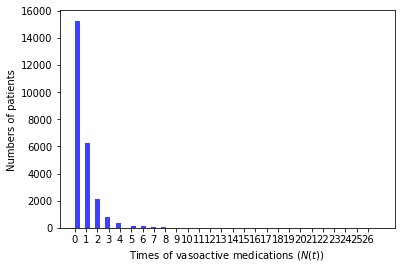

In [137]:
plt.pyplot.hist(vasTimes,bins=60,facecolor='b', alpha=0.75)
plt.pyplot.xticks(range(max(vasTimes)))
plt.pyplot.xlabel(r'Times of vasoactive medications ($N(t)$)')
plt.pyplot.ylabel('Numbers of patients')

## statistics of the sedative medications

In [119]:
sedBlock = []
for item in icustay_id:
    patient = mimic3[mimic3.icustay_id == item]
    lis2 = list(patient['sedative medications'])
    curBlock = [[i for i,value in it] for key,it in itertools.groupby(enumerate(list(lis2)), key=operator.itemgetter(1)) if key != 0]
    sedBlock.append(curBlock)
sedTimes = [len(item) for item in sedBlock]

Text(0,0.5,'Numbers of patients')

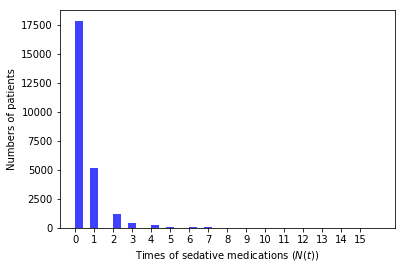

In [138]:
plt.pyplot.hist(sedTimes,bins=40,facecolor='b', alpha=0.75)
plt.pyplot.xticks(range(max(sedTimes)))
plt.pyplot.xlabel(r'Times of sedative medications ($N(t)$)')
plt.pyplot.ylabel('Numbers of patients')